<a href="https://colab.research.google.com/github/2003Yash/Multi-Modal-RAG/blob/main/multi_modal_RAG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Multi-Modal Retrieval using GPT text embedding and CLIP image embedding for Wikipedia Articles

Step-1: Install Dependencies

In [ ]:
%pip install -q llama-index-vector-stores-qdrant

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.2/267.2 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 61.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 59.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 40.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.6/316.6 kB 19.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-datastore 2.19.0 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.

In [ ]:
%pip install llama_index ftfy regex tqdm
%pip install git+https://github.com/openai/CLIP.git
%pip install torch torchvision
%pip install matplotlib scikit-image
%pip install -U qdrant_client

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.8/176.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.8/295.8 kB 19.8 MB/s eta 0:00:00
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-z2zl3hbg
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-z2zl3hbg
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369489 sha256=ec9d920b6a4462c8b84fbc906cd7523bfb1bc788af10e2b3e569f133da60a9b9
  Stored in directory: /tmp/pip-ephem-wheel-cache-xpv8mr5m/wheels/da/2b/4c/d6691fa9597aac8bb85d2ac13b112deb897d5b50f5ad9a37e4
Successfully built clip


In [ ]:
!pip install llama-index-embeddings-clip #For multi-modal embeddings (text and image).
# %pip will install the package in the virtual environment where the current notebook kernel is running. While !pip will install the package in the base environment.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 52.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 82.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 64.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 41.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 778.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1

In [ ]:
!pip install transformers

Load and Download Multi-Modal datasets including texts and images from Wikipedia

In [ ]:
!pip install wikipedia

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11679 sha256=5ab9c0136ec8cab782e2263100754eedc0dab03a61565459a9e0b453cd38f468
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


Download Wikipedia Articles

step-2: Get Text from wiki

In [ ]:
# Parse wikipedia articles and save into local folder
import requests

wiki_titles = [
    "RoboCop",
    "Labour Party (UK)",
    "SpaceX",
    "OpenAI",
]

data_path = Path("data_wiki")

for title in wiki_titles:
    response = requests.get(
        "https://en.wikipedia.org/w/api.php",
        params={
            "action": "query",
            "format": "json",
            "titles": title,
            "prop": "extracts",
            "explaintext": True },).json() # GET request is made to the Wikipedia API, fetching the plain text in specified format.

    page = next(iter(response["query"]["pages"].values())) # using next iter we iterate over list of pages in response variable create in before to extract ["query"]["page"] columns.
    wiki_text = page["extract"] #"extract" key in the page dictionary holds the plain text content of the Wikipedia page.

    if not data_path.exists(): # A directory named data_wiki is created to store the text files if it doesn't exist.
        Path.mkdir(data_path)

    with open(data_path / f"{title}.txt", "w") as fp: # file handling  code with write permission.
        fp.write(wiki_text)

step-3: Get Images from wiki

In [ ]:
import wikipedia

from pathlib import Path
import urllib.request

image_path = Path("data_wiki")
image_uuid = 0

# Create a dictionary to store image metadata and set a limit for images downloaded per article.
image_metadata_dict = {}  # image_metadata_dict stores images metadata including image uuid, filename and path
MAX_IMAGES_PER_WIKI = 30

wiki_titles = [
    "RoboCop",
    "Labour Party (UK)",
    "SpaceX",
    "OpenAI",
]

# create folder for images only
if not image_path.exists():
    Path.mkdir(image_path)

# Download images for wiki pages
# Assing UUID for each image

for title in wiki_titles:
    images_per_wiki = 0
    print(title)
    try:
        page_py = wikipedia.page(title)
        list_img_urls = page_py.images # For each title, fetch the corresponding Wikipedia page.
        for url in list_img_urls:
            if url.endswith(".jpg") or url.endswith(".png"): # only if format is jpg or png
                image_uuid += 1
                image_file_name = title + "_" + url.split("/")[-1]

                # img_path could be s3 path pointing to the raw image file in the future

                #getting image metadata
                image_metadata_dict[image_uuid] = {
                    "filename": image_file_name,
                    "img_path": "./" + str(image_path / f"{image_uuid}.jpg"),
                }

                #getting image and storing in folder
                urllib.request.urlretrieve(
                    url, image_path / f"{image_uuid}.jpg"
                )

                images_per_wiki += 1 #increment number of images we got per wiki
                if images_per_wiki > MAX_IMAGES_PER_WIKI: # break if we got too many images
                    break

    except: # if no images were found in article.
        print(str(Exception("No images found for Wikipedia page: ")) + title)
        continue

RoboCop
Labour Party (UK)
No images found for Wikipedia page: Labour Party (UK)
SpaceX
No images found for Wikipedia page: SpaceX
OpenAI


Step 4: Setting Up environment and hf token for Embedding and Vector Store

In [ ]:
import os
from google.colab import userdata

# Set Hugging Face token from environment variables
os.environ["HUGGINGFACE_TOKEN"] = userdata.get('HF_TOKEN')

In [ ]:
!pip install sentence_transformers

In [ ]:
!pip install llama-index-embeddings-huggingface

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 861.9/861.9 kB 13.4 MB/s eta 0:00:00


In [ ]:
!pip install llama-index-embeddings-langchain

In [ ]:
!pip install -U langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 31.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 408.7/408.7 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 53.7 MB/s eta 0:00:00
  Attempting uninstall: SQLAlchemy
    Found existing installation: SQLAlchemy 2.0.36
    Uninstalling SQLAlchemy-2.0.36:
      Successfully uninstalled SQLAlchemy-2.0.36
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.13
    Uninstalling langchain-core-0.3.13:
      Successfully uninstalled langchain-core-0.3.13
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.4
    Uninstalling langchain-0.3.4:
      Successfully uninstalled langchain-0.3.4


Step-5: Initialize embedding model and Multi Modal Vector Store for storing Text and Image embeddings under different collections

In [ ]:
import qdrant_client
from llama_index.core import SimpleDirectoryReader
from llama_index.vector_stores.qdrant import QdrantVectorStore
from llama_index.core import VectorStoreIndex, StorageContext
from llama_index.core.indices import MultiModalVectorStoreIndex
from transformers import CLIPProcessor, CLIPModel
from langchain.embeddings.huggingface import HuggingFaceEmbeddings
from llama_index.embeddings.langchain import LangchainEmbedding
from llama_index.core.service_context import ServiceContext

embed_model = LangchainEmbedding(
  HuggingFaceEmbeddings(model_name="thenlper/gte-large") # pre-trained model that converts text into embeddings (dense vector representations). These embeddings are typically used for tasks like semantic search, clustering, or similarity comparison between text data.
  # then1per is better embedding format than sentence embedding
)

# Create a local Qdrant vector store
client = qdrant_client.QdrantClient(path="qdrant_d_2")

text_store = QdrantVectorStore(
    client=client, collection_name="text_collection_0"
)
image_store = QdrantVectorStore(
    client=client, collection_name="image_collection_0"
)
storage_context = StorageContext.from_defaults(
    vector_store=text_store, image_store=image_store
)


Step 6: Embed the text using embedding model to vector store

In [ ]:

documents = SimpleDirectoryReader("./data_wiki/").load_data()

index = MultiModalVectorStoreIndex.from_documents(
    documents,
    storage_context=storage_context,
    embed_model=embed_model # Pass embed_model to from_documents
)
# if error pops up change number in client var to q_(something)

Step-7: Plot downloaded Images from Wikipedia for validating any errors in image and visually explore the images using metadata

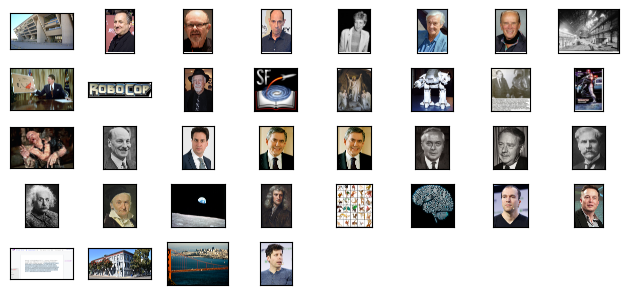

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import os

def plot_images(image_metadata_dict):
    original_images_urls = []
    images_shown = 0
    for image_id in image_metadata_dict:
        img_path = image_metadata_dict[image_id]["img_path"]
        if os.path.isfile(img_path):
            filename = image_metadata_dict[image_id]["filename"]
            image = Image.open(img_path).convert("RGB")

            plt.subplot(8, 8, len(original_images_urls) + 1)
            plt.imshow(image)
            plt.xticks([])
            plt.yticks([])

            original_images_urls.append(filename)
            images_shown += 1
            if images_shown >= 64:
                break

    plt.tight_layout()

plot_images(image_metadata_dict)

Get Multi-Modal retrieval results for some example queries

Step-8: Text retrievaing for sample query

In [ ]:
test_query = "what is the Labour Party?"
# generate  retrieval results
retriever = index.as_retriever(similarity_top_k=3, image_similarity_top_k=5) # index.as retriever = initializes a retriever object for the multi-modal index created earlier to bring out top 3 best text matches and top 5 best image matches
retrieval_results = retriever.retrieve(test_query) # .retrieve() = returns a list of nodes that match the query based on the specified top_k values

In [ ]:
retrieval_results # has text file names with text data and image file names

[NodeWithScore(node=TextNode(id_='6c649842-d53f-4945-8638-44fcfaf9dd91', embedding=None, metadata={'file_path': '/content/data_wiki/Labour Party (UK).txt', 'file_name': 'Labour Party (UK).txt', 'file_type': 'text/plain', 'file_size': 49219, 'creation_date': '2024-11-03', 'last_modified_date': '2024-11-03'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={<NodeRelationship.SOURCE: '1'>: RelatedNodeInfo(node_id='8d2adbb5-78c3-4a46-a26d-840b5927b991', node_type=<ObjectType.DOCUMENT: '4'>, metadata={'file_path': '/content/data_wiki/Labour Party (UK).txt', 'file_name': 'Labour Party (UK).txt', 'file_type': 'text/plain', 'file_size': 49219, 'creation_date': '2024-11-03', 'last_modified_date': '2024-11-03'}, hash='5f1c9de06c9597ae88f02694bb62fded94cc8bf262207a45b7c5f3d9

Step-10: Image retrieval for sample query

Define a plot image function for future useage with querys

In [ ]:
def plot_images(image_paths):
    images_shown = 0
    plt.figure(figsize=(16, 9))
    for img_path in image_paths:
        if os.path.isfile(img_path):
            image = Image.open(img_path)

            plt.subplot(2, 3, images_shown + 1)
            plt.imshow(image)
            plt.xticks([])
            plt.yticks([])

            images_shown += 1
            if images_shown >= 9:
                break

**Node ID:** 6c649842-d53f-4945-8638-44fcfaf9dd91<br>**Similarity:** 0.9302097919513468<br>**Text:** The Labour Party is a political party in the United Kingdom that sits on the centre-left of the political spectrum. In a broader sense, the party has been described as an alliance of social democra...<br>

**Node ID:** 26d524ee-c473-4f10-8f47-dc9dff0b5311<br>**Similarity:** 0.9020864966582616<br>**Text:** == Constitution and structure ==

The Labour Party is a membership organisation consisting of individual members and constituency Labour parties, affiliated trade unions, socialist societies and th...<br>

**Node ID:** 42ed5ac9-c423-44ba-9c46-625654b21ba6<br>**Similarity:** 0.8935812207207543<br>**Text:** == Ideology ==

Labour sits on the centre-left of the political spectrum. It was formed to provide political representation for the trade union movement at in Parliament. The Labour Party gained a ...<br>

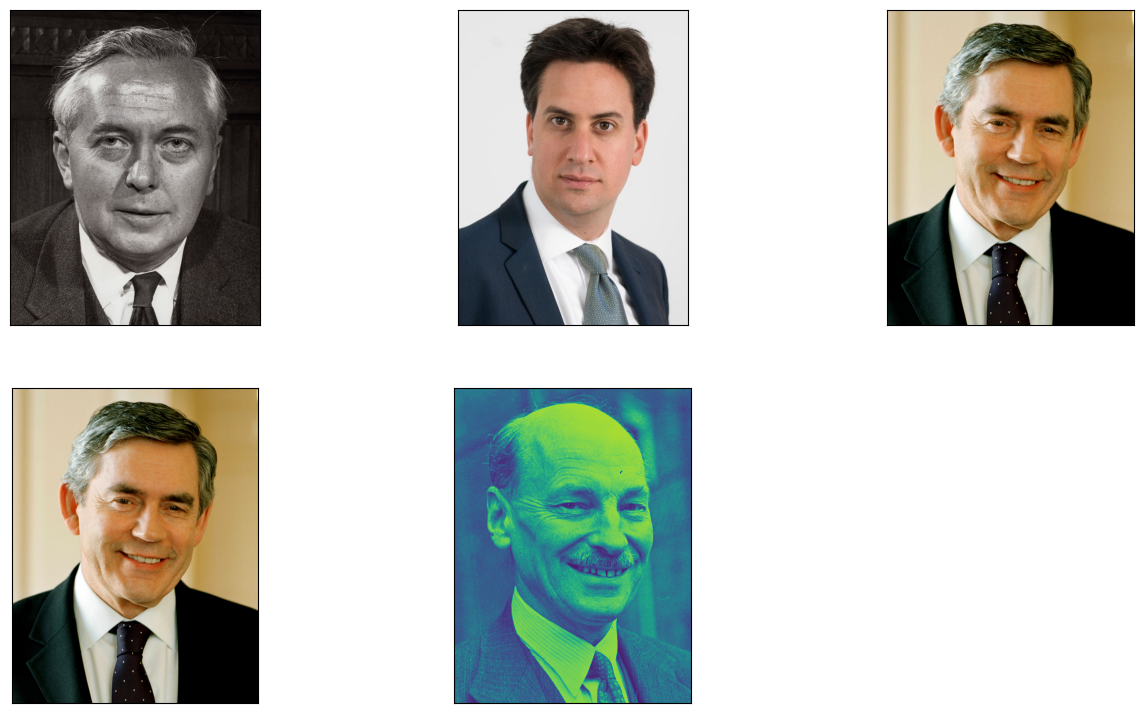

In [ ]:
from llama_index.core.response.notebook_utils import display_source_node
from llama_index.core.schema import ImageNode

retrieved_image = []
for res_node in retrieval_results: # loops through each node in the retrieval_results.
    if isinstance(res_node.node, ImageNode): # verifying if it’s an instance of Image
        retrieved_image.append(res_node.node.metadata["file_path"]) # appends the file path of the image to the retrieved_image list.
    else: # if text node
        display_source_node(res_node, source_length=200) # renders only 200 char from each text node into readable format and displays it

plot_images(retrieved_image)

Test out some other sample Queries.

**Node ID:** 8dea30c1-ce9d-4edc-b108-dd8e5edd7a12<br>**Similarity:** 0.9137272475045982<br>**Text:** RoboCop is a 1987 American science fiction action film directed by Paul Verhoeven and written by Edward Neumeier and Michael Miner. The film stars Peter Weller, Nancy Allen, Daniel O'Herlihy, Ronny...<br>

**Node ID:** 5b1210be-91f3-4ac2-ba8f-3b616ccc8dbd<br>**Similarity:** 0.8836272507003433<br>**Text:** === Development ===

The first draft of the script, RoboCop: The Future of Law Enforcement, was given to industry friends and associates in early 1985. A month later, Neumeier and Miner had two off...<br>

**Node ID:** b04a23a8-e0c6-4244-afd9-8af72e428c26<br>**Similarity:** 0.8789465564923629<br>**Text:** == Cast ==

Peter Weller as Alex Murphy / RoboCop: A Detroit police officer murdered in the line of duty and revived as a cyborg
Nancy Allen as Anne Lewis: A tough and loyal police officer
Daniel O...<br>

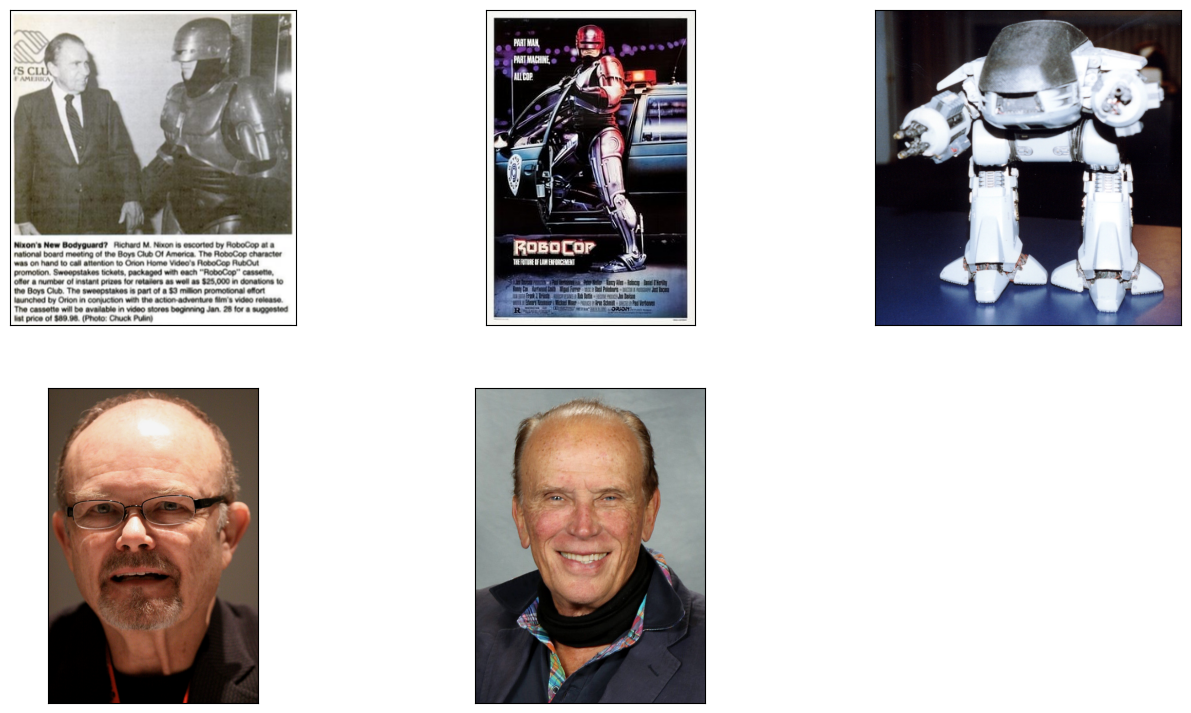

In [ ]:
test_query = "Who created RoboCop?"
# generate  retrieval results
retriever = index.as_retriever(similarity_top_k=3, image_similarity_top_k=5)
retrieval_results = retriever.retrieve(test_query)

retrieved_image = []
for res_node in retrieval_results:
    if isinstance(res_node.node, ImageNode):
        retrieved_image.append(res_node.node.metadata["file_path"])
    else:
        display_source_node(res_node, source_length=200)

plot_images(retrieved_image)

**Node ID:** 76759a85-21bd-4657-962b-ca4f8cab2d95<br>**Similarity:** 0.9011049342503796<br>**Text:** OpenAI is an American artificial intelligence (AI) research organization founded in December 2015 and headquartered in San Francisco, California. Its mission is to develop "safe and beneficial" art...<br>

**Node ID:** 8f9df540-b478-4c94-80a8-90c53baa5790<br>**Similarity:** 0.8853062508299878<br>**Text:** Meanwhile, other publications like The New York Times chose to sue OpenAI and Microsoft for copyright infringement over the use of their content to train AI models.
On May 29, 2024, Axios reported ...<br>

**Node ID:** e943c69e-e64f-413d-b4a0-3524da3f8f92<br>**Similarity:** 0.8717399277201037<br>**Text:** === 2024–present: Public/non-profit efforts, Sora, partnership with Apple ===
On January 16, 2024, in response to intense scrutiny from regulators around the world, OpenAI announced the formation o...<br>

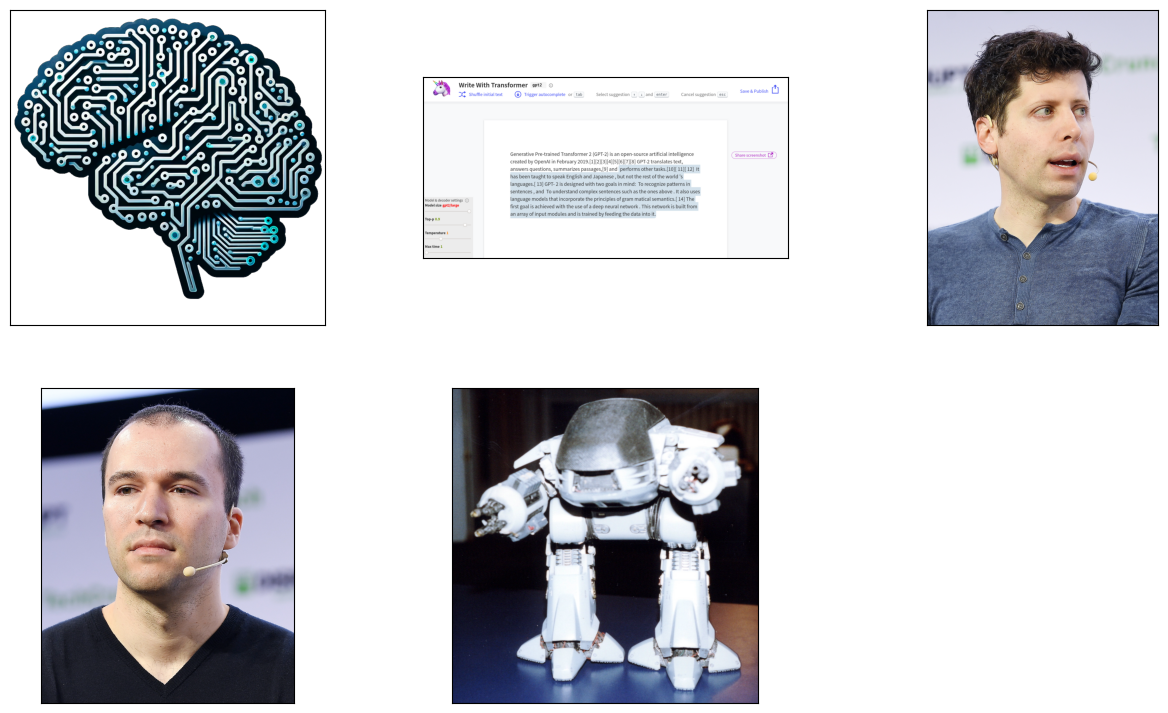

In [ ]:
test_query = "What does OpenAI do?"
# generate  retrieval results
retriever = index.as_retriever(similarity_top_k=3, image_similarity_top_k=5)
retrieval_results = retriever.retrieve(test_query)

retrieved_image = []
for res_node in retrieval_results:
    if isinstance(res_node.node, ImageNode):
        retrieved_image.append(res_node.node.metadata["file_path"])
    else:
        display_source_node(res_node, source_length=200)

plot_images(retrieved_image)

**Node ID:** 88120e82-7406-4d11-ba75-4c747d993515<br>**Similarity:** 0.8200062021565352<br>**Text:** Space Exploration Technologies Corp., commonly referred to as SpaceX, is an American space technology company. Since its founding in 2001, the company has made great advancement in rocket propulsio...<br>

**Node ID:** 297af2cd-19da-478d-bb32-b80757e81cad<br>**Similarity:** 0.8171310269092882<br>**Text:** === 2005–2009: Falcon 1 and first orbital launches ===

SpaceX developed its first orbital launch vehicle, the Falcon 1, with internal funding. The Falcon 1 was an expendable two-stage-to-orbit sma...<br>

**Node ID:** 0732e939-a960-4906-b056-741f3ef33a81<br>**Similarity:** 0.8065366356650343<br>**Text:** === Other ===
In July 2018, Musk arranged for his employees to build a mini-submarine to assist the rescue of children stuck in a flooded cavern in Thailand. Richard Stanton, leader of the internat...<br>

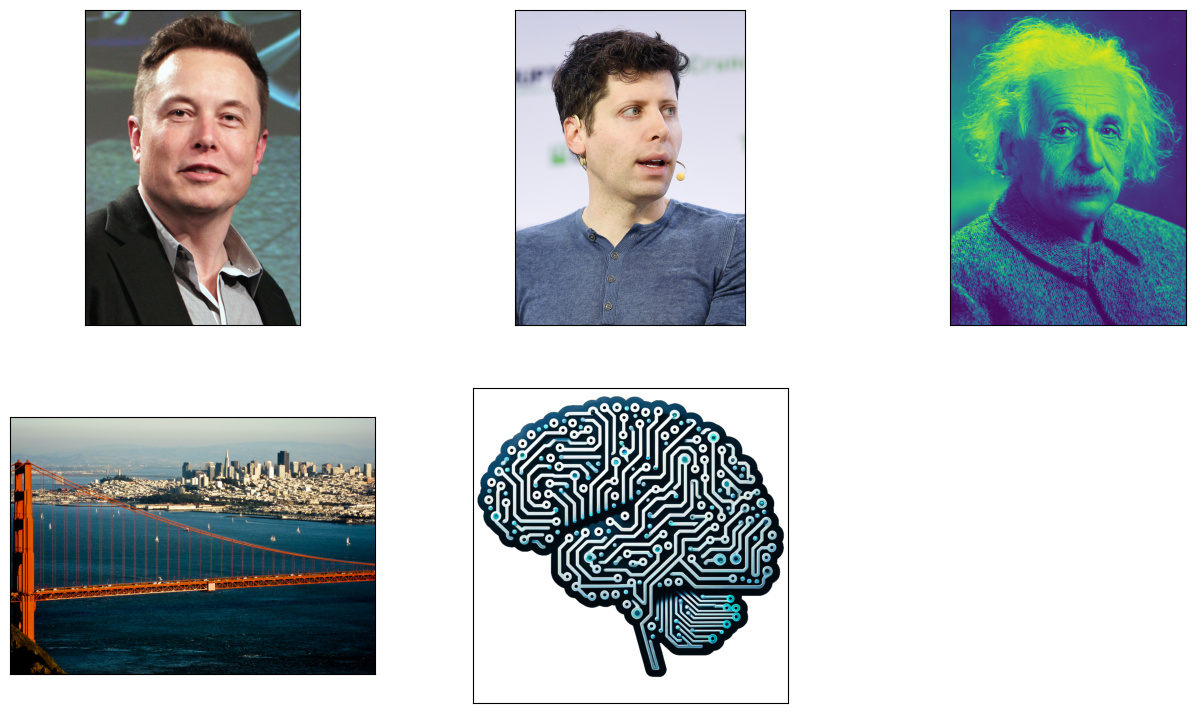

In [ ]:
test_query = "which company makes Tesla"
# generate  retrieval results
retriever = index.as_retriever(similarity_top_k=3, image_similarity_top_k=5)
retrieval_results = retriever.retrieve(test_query)

retrieved_image = []
for res_node in retrieval_results:
    if isinstance(res_node.node, ImageNode):
        retrieved_image.append(res_node.node.metadata["file_path"])
    else:
        display_source_node(res_node, source_length=200)

plot_images(retrieved_image)